In [ ]:
20# GoogleLENET

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from tensorflow import keras

In [ ]:
from PIL import Image
import os
from numpy import asarray

In [ ]:
all_images = []
n=0
for image_path in os.listdir('/content/drive/MyDrive/Project/Axial/AD'):
    image_path='/content/drive/MyDrive/Project/Axial/AD/'+image_path
    img = Image.open(image_path)
    img=img.resize((160,256))
    n=n+1
    im=asarray(img)
    all_images.append(im)

In [ ]:
n=0
for image_path in os.listdir('/content/drive/MyDrive/Project/Axial/CI'):
  image_path='/content/drive/MyDrive/Project/Axial/CI/'+image_path
  img = Image.open(image_path)
  img = img.resize((160,256))
  n=n+1
  im=asarray(img)
  all_images.append(im)
  
print(n)

n=0
for image_path in os.listdir('/content/drive/MyDrive/Project/Axial/CN'):
  image_path='/content/drive/MyDrive/Project/Axial/CN/'+image_path
  img = Image.open(image_path)
  img = img.resize((160,256))
  n=n+1
  im=asarray(img)
  all_images.append(im)
print(n)

2620
1450


In [ ]:
all_images[0].shape

(256, 160)

In [ ]:
target=[]
n = 0
for x in list(range(0,1124)):
    target.append(0)
    n=n+1
print(n)
n = 0
for x in list(range(0,2620)):
    target.append(1)
    n=n+1
print(n)
n = 0
for x in list(range(0,1450)):
    target.append(2)
    n=n+1
print(n)

len(target)

1124
2620
1450


5194

In [ ]:
target=np.array(target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_images,target,test_size=0.2, random_state=0)

In [ ]:
for x in list(range(0,4155)):
  X_train[x]=X_train[x]/255.0


for x in list(range(0,1039)):
  X_test[x]=X_test[x]/255.0

In [ ]:
X_test=np.array(X_test)

In [ ]:
X_train=np.array(X_train)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],256 ,160,1)
X_test = X_test.reshape(X_test.shape[0],256,160,1)

In [ ]:
X_test.shape

(1039, 256, 160, 1)

In [ ]:
X_test[0].shape

(256, 160, 1)

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)

In [ ]:
from keras.models import Sequential
from keras import models, layers
import keras

model = Sequential()

model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=X_train[0].shape, padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

model.add(layers.Flatten())


model.add(layers.Dense(84, activation='tanh'))


model.add(layers.Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD', metrics=["accuracy"])

In [ ]:
y_test.shape

(1039, 3)

In [ ]:
X_test.shape

(1039, 256, 160, 1)

In [ ]:
hist = model.fit(X_train,y_train,epochs=5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
130/130 [==============================] - 634s 5s/step - loss: 0.7655 - accuracy: 0.6801 - val_loss: 0.5765 - val_accuracy: 0.7517
Epoch 2/5
130/130 [==============================] - 638s 5s/step - loss: 0.3132 - accuracy: 0.8929 - val_loss: 0.2345 - val_accuracy: 0.9201
Epoch 3/5
130/130 [==============================] - 646s 5s/step - loss: 0.1161 - accuracy: 0.9694 - val_loss: 0.1190 - val_accuracy: 0.9625
Epoch 4/5
130/130 [==============================] - 643s 5s/step - loss: 0.0491 - accuracy: 0.9904 - val_loss: 0.0910 - val_accuracy: 0.9673
Epoch 5/5
130/130 [==============================] - 654s 5s/step - loss: 0.0216 - accuracy: 0.9986 - val_loss: 0.0341 - val_accuracy: 0.9894


Text(0, 0.5, 'accuracy')

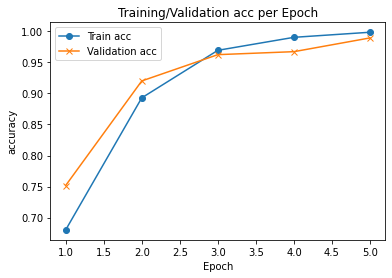

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')